# Kush Dave

# GRIP-The Spark Foundation

# TASK-2 Prediction using unsupervised Machine Learning
Level - Beginner

IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

STEP-1 LOADING IRIS DATASET

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/KavyaRayidi/Prediction-using-unsupervised-ML-using-iris-dataset/main/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


STEP-2 DATA VISUALIZATION 

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 6)

In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


STEP-3 FINDING THE NUMBER OF CLUSTERS FOR K-MEANS CLASSFICATION

In [29]:
X = data.iloc[:, [0, 1, 2, 3]].values
X
from sklearn.cluster import KMeans
meank = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    meank.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


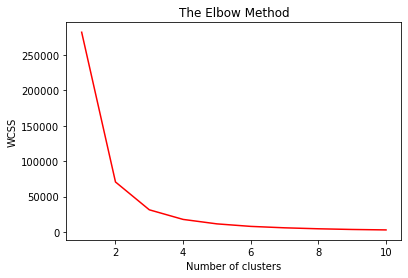

In [30]:
plt.plot(range(1,11),meank,color="red")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

STEP-4 APPLYING KMEANS TO THE DATASET WITH OPTIMUM NUMBER OF CLUSTERS

In [31]:
k_means = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
pred_kmeans = k_means.fit_predict(X)

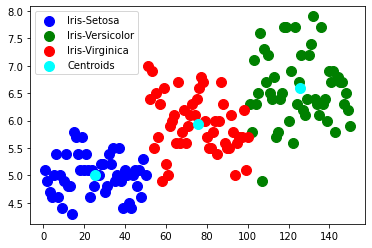

In [33]:
plt.scatter(X[pred_kmeans == 0, 0], X[pred_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-Setosa')
plt.scatter(X[pred_kmeans == 1, 0], X[pred_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-Versicolor')
plt.scatter(X[pred_kmeans == 2, 0], X[pred_kmeans == 2, 1], s = 100, c = 'red', label = 'Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s =100, c = 'cyan', label = 'Centroids')
plt.legend()